# Домашнее задание №3

In [410]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

%matplotlib inline

Таблица Indian liver pations records.

Загрузить датасет https://www.kaggle.com/uciml/indian-liver-patient-records. 

In [411]:
url="http://yustiks.ru/dataset/indian_liver_patient.csv"
data=pd.read_csv(url)
data.tail()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,2


Columns:

*  Age of the patient
*  Gender of the patient
*  Total Bilirubin
*  Direct Bilirubin
*  Alkaline Phosphotase
*  Alamine Aminotransferase
*  Aspartate Aminotransferase
*  Total Protiens
*  Albumin
*  Albumin and Globulin Ratio
*  Dataset: field used to split the data into two sets (patient with liver disease, or no disease)


Dataset: пациент с болезнью печени - 1,
         пациент не болеет - 2

Построить одномерную линейную регрессию Direct_Bilirubin и Total_Bilirubin, предварительно разделив данные на 80% тренировочных и 20% тестовых. Построить график: исходных тренировочных и тестовых данных, а также прямой линейной регрессии.

In [412]:
X_train, X_test, y_train, y_test = train_test_split(
    data['Direct_Bilirubin'],
    data['Total_Bilirubin'],
    test_size = 0.2,
    random_state = 1
)

In [413]:
X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

In [414]:
model = LinearRegression()

In [415]:
model.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [416]:
model.score(X_test, y_test)

0.930804096867935

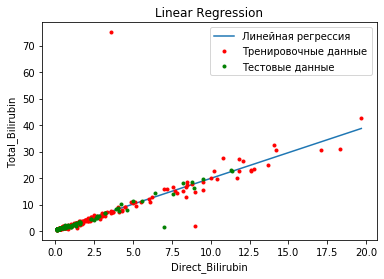

In [417]:
plt.xlabel('Direct_Bilirubin')
plt.ylabel('Total_Bilirubin')
plt.title('Linear Regression')
x = np.linspace(min(X_train), max(X_train))
y = (model.coef_*x + model.intercept_)
plt.plot(x,y)
plt.plot(X_train, y_train, 'r.')
plt.plot(X_test, y_test, 'g.')
plt.legend(['Линейная регрессия', 'Тренировочные данные', 'Тестовые данные'])


Построить одномерную полиномиальную регрессию на Direct_Bilirubin и Total_Bilirubin, используя тренировочные и тестовые данные из шага выше. Проверить точность предсказаний на тестовых данных. Получилось ли улучшить результат?

In [418]:
poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(X_train)

pol_reg = LinearRegression()
pol_reg.fit(X_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [419]:
pol_reg.score(poly_reg.fit_transform(X_test), y_test)

0.9223871317241478

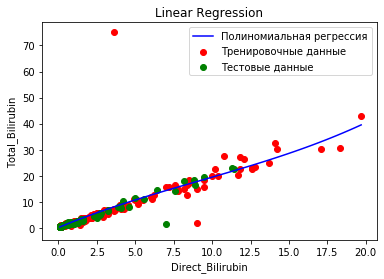

In [420]:
plt.scatter(X_train, y_train, c='red')
plt.scatter(X_test, y_test, c='green')
x = np.linspace(min(X_test), max(X_train))
y = pol_reg.predict(poly_reg.fit_transform(x))
plt.plot(x, y, 'b')
plt.xlabel('Direct_Bilirubin')
plt.ylabel('Total_Bilirubin')
plt.title('Linear Regression')
plt.legend(['Полиномиальная регрессия', 'Тренировочные данные', 'Тестовые данные'])

улучшить не удалось

Построить многомерную **логистическую регрессию** для предсказания болезни (Dataset) от всех параметров, предварительно разделив данные на 80% тренировочных и 20% тестовых.

Сделать классификационный отчет (куда включить количество найденных параметров true positive и false negative). Посмотреть какой получился результат.

In [421]:
for i in data:
    print(i, data[i].isnull().sum())  

Age 0
Gender 0
Total_Bilirubin 0
Direct_Bilirubin 0
Alkaline_Phosphotase 0
Alamine_Aminotransferase 0
Aspartate_Aminotransferase 0
Total_Protiens 0
Albumin 0
Albumin_and_Globulin_Ratio 4
Dataset 0


In [422]:
data_witout_na = data.dropna()

In [423]:
for i in data_witout_na:
    print(i, data_witout_na[i].isnull().sum())  

Age 0
Gender 0
Total_Bilirubin 0
Direct_Bilirubin 0
Alkaline_Phosphotase 0
Alamine_Aminotransferase 0
Aspartate_Aminotransferase 0
Total_Protiens 0
Albumin 0
Albumin_and_Globulin_Ratio 0
Dataset 0


In [424]:
y = data_witout_na.Dataset
X = data_witout_na.drop(["Dataset"], axis = 1)
X.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40


In [425]:
X['Is_Man'] = (X['Gender'] == 'Male').astype('int')
X.drop('Gender', axis = 1, inplace=True)

In [433]:
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=1)

In [367]:
model = LogisticRegression(solver='liblinear').fit(X_train, y_train)
model_pred = model.predict(X_test)

print(classification_report(y_test, model_pred))

              precision    recall  f1-score   support

           1       0.75      0.98      0.85        82
           2       0.78      0.21      0.33        34

    accuracy                           0.75       116
   macro avg       0.76      0.59      0.59       116
weighted avg       0.76      0.75      0.69       116




Улучшить модель за счет уменьшения параметров, отобранных для обучения модели. Выбрать только те атрибуты, которые коррелируют с таргет значением (атрибут Dataset) более 50% (нужно будет построить матрицу корреляций и посмотреть в ней параметры, наиболее коррелирующие с Dataset атрибутом). Проверить модель на тестовых данных, полученных выше. Построить классификационный отчет, сделать сравнение двух моделей по этим классификационным отчетам.

In [435]:
data.corr().style.background_gradient(cmap='coolwarm')

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
Age,1,0.0117627,0.00752914,0.0804246,-0.0868828,-0.0199099,-0.187461,-0.265924,-0.216408,-0.137351
Total_Bilirubin,0.0117627,1,0.874618,0.206669,0.214065,0.237831,-0.00809934,-0.22225,-0.206267,-0.220208
Direct_Bilirubin,0.00752914,0.874618,1,0.234939,0.233894,0.257544,-0.000138741,-0.228531,-0.200125,-0.246046
Alkaline_Phosphotase,0.0804246,0.206669,0.234939,1,0.12568,0.167196,-0.0285144,-0.165453,-0.234166,-0.184866
Alamine_Aminotransferase,-0.0868828,0.214065,0.233894,0.12568,1,0.791966,-0.0425182,-0.0297417,-0.00237499,-0.163416
Aspartate_Aminotransferase,-0.0199099,0.237831,0.257544,0.167196,0.791966,1,-0.0256454,-0.0852903,-0.0700398,-0.151934
Total_Protiens,-0.187461,-0.00809934,-0.000138741,-0.0285144,-0.0425182,-0.0256454,1,0.784053,0.234887,0.0350082
Albumin,-0.265924,-0.22225,-0.228531,-0.165453,-0.0297417,-0.0852903,0.784053,1,0.689632,0.161388
Albumin_and_Globulin_Ratio,-0.216408,-0.206267,-0.200125,-0.234166,-0.00237499,-0.0700398,0.234887,0.689632,1,0.163131
Dataset,-0.137351,-0.220208,-0.246046,-0.184866,-0.163416,-0.151934,0.0350082,0.161388,0.163131,1


In [436]:
X_train

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Is_Man
445,17,0.9,0.2,279,40,46,7.3,4.0,1.2,1
407,12,1.0,0.2,719,157,108,7.2,3.7,1.0,1
119,32,18.0,8.2,298,1250,1050,5.4,2.6,0.9,1
521,55,4.4,2.9,230,14,25,7.1,2.1,0.4,1
498,68,1.8,0.5,151,18,22,6.5,4.0,1.6,1
...,...,...,...,...,...,...,...,...,...,...
129,45,2.8,1.7,263,57,65,5.1,2.3,0.8,1
144,45,3.5,1.5,189,63,87,5.6,2.9,1.0,0
72,75,0.8,0.2,205,27,24,4.4,2.0,0.8,0
236,22,0.8,0.2,300,57,40,7.9,3.8,0.9,1


In [438]:
X_train = X_train[['Direct_Bilirubin','Total_Bilirubin']]
X_test = X_test[['Direct_Bilirubin','Total_Bilirubin']]

model = LogisticRegression(solver='liblinear').fit(X_train, y_train)

In [439]:
model_pred = model.predict(X_test)
print(classification_report(y_test, model_pred))

              precision    recall  f1-score   support

           1       0.71      1.00      0.83        82
           2       0.00      0.00      0.00        34

    accuracy                           0.71       116
   macro avg       0.35      0.50      0.41       116
weighted avg       0.50      0.71      0.59       116



/Users/user/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Посчитать квартили для всех колонок. 

In [440]:
X.quantile([0.25, 0.5, 0.75])

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Is_Man
0.25,33.0,0.8,0.2,175.5,23.0,25.0,5.8,2.6,0.70,1.0
0.50,45.0,1.0,0.3,208.0,35.0,42.0,6.6,3.1,0.93,1.0
0.75,58.0,2.6,1.3,298.0,61.0,87.0,7.2,3.8,1.10,1.0


Построить график histogram двух выборок по наличию или отсутствию болезни: люди, возрастом до 50 лет, и люди после 50 лет. Посчитать среднее значение и квартиль 0.5 в данных выборках. Чем они отличаются?

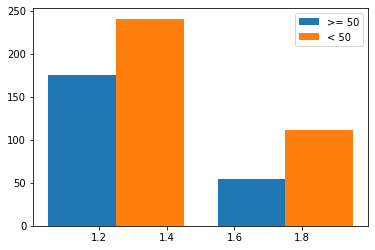

In [441]:
plt.hist([data[(data['Age'] >= 50)]['Dataset'],
         data[(data['Age'] < 50)]['Dataset']],  
        label=['>= 50', '< 50'], bins = 2)
plt.legend()
plt.show()
# 1 - healthy 2 - ill

In [442]:
print(data[(data['Age'] >= 50)]['Dataset'].mean())
print(data[(data['Age'] >= 50)]['Dataset'].quantile(0.5))

1.2391304347826086
1.0


In [443]:
print(data[(data['Age'] < 50)]['Dataset'].mean())
print(data[(data['Age'] < 50)]['Dataset'].quantile(0.5))

1.3172804532577904
1.0


тк величины дискретные значения отличаются за счет того что mean не обязательнно принадлежит значениям (0,1)


Посчитать критерий одновыборочный t-критерий для выборки по критерию Total_Bilirubin у больных людей. Как показатель помогает понять, что выборки не похожа на генеральную совокупность?

In [444]:
import scipy.stats as stats
data_ill = data[data['Dataset'] == 2]['Total_Bilirubin']
stats.ttest_1samp(data_ill, data['Total_Bilirubin'].mean())

Ttest_1sampResult(statistic=-27.741265868012505, pvalue=3.180002804533163e-64)

pvalue < 5% значит выборка не похожа на генеральную совокупность

Посчитать критерий t для двух выборок: больные и здоровые (по критерию Total_Bilirubin). Имеют ли данные группы схожесть?

In [445]:
data_ill = data[data['Dataset']==2]['Total_Bilirubin']
data_heal = data[data['Dataset']==1]['Total_Bilirubin']

stats.ttest_ind(data_ill, data_heal)

Ttest_indResult(statistic=-5.441441126834863, pvalue=7.801430929364345e-08)

 p-value равно 7.801430929364345e-08, что намного меньше стандартной альфа ошибки 0.05, поэтому мы отвергаем нулевую гипотезу 

Посчитать статистическую значимость для трех выборок (по возрасту) - 1ая группа от 1 до 30 лет, 2ая группа от 30 лет до 55, 3я группа более 55 по выборке Dataset. Сравнить с реальностью (они логично что будут отличаться).

In [446]:
group_1 = data[(data['Age'] < 30)]['Dataset']
group_2 = data[(data['Age'] >= 30) & (data['Age'] < 55)]['Dataset']
group_3 = data[(data['Age'] > 55)]['Dataset']

In [384]:
stats.f_oneway(group_1, group_2, group_3)

F_onewayResult(statistic=8.979641248857694, pvalue=0.00014494594843704077)

pvalue < 5% => выборки отличаются что логично и соотносится с реальностью